In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
# Carga desde un archivo .xlsx sin indice
Mexico = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['host_total_listings_count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['host_total_listings_count'].max()
Min = Mexico['host_total_listings_count'].min()
Limites = [Min, Max]
Limites

[1.0, 550.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

549.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

34.991262678126425

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 550, 16)
intervalos

array([  1. ,  37.6,  74.2, 110.8, 147.4, 184. , 220.6, 257.2, 293.8,
       330.4, 367. , 403.6, 440.2, 476.8, 513.4, 550. ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['host_total_listings_count'] = pd.cut ( x = Mexico ['host_total_listings_count'], bins = intervalos, labels = categorias )
Mexico['host_total_listings_count']

0               NaN
1        Categoria1
2        Categoria1
3        Categoria1
4        Categoria1
            ...    
26577    Categoria8
26578    Categoria1
26579    Categoria1
26580    Categoria1
26581    Categoria1
Name: host_total_listings_count, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['host_total_listings_count'])
table1

,host_total_listings_count,frequency,percentage,cumulative_perc
0,Categoria1,18007,0.677413,0.836601
1,Categoria2,1537,0.057821,0.908010
2,Categoria3,790,0.029719,0.944713
3,Categoria4,322,0.012113,0.959673
4,Categoria8,298,0.011211,0.973518
5,Categoria7,197,0.007411,0.982671
6,Categoria6,194,0.007298,0.991684
7,Categoria13,109,0.004101,0.996748
8,Categoria5,36,0.001354,0.998420
9,Categoria10,26,0.000978,0.999628


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_total_listings_count,frequency
0,Categoria1,18007
1,Categoria2,1537
2,Categoria3,790
3,Categoria4,322
4,Categoria8,298
5,Categoria7,197
6,Categoria6,194
7,Categoria13,109
8,Categoria5,36
9,Categoria10,26


In [14]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] >= 26]
Filtro

,host_total_listings_count,frequency
0,Categoria1,18007
1,Categoria2,1537
2,Categoria3,790
3,Categoria4,322
4,Categoria8,298
5,Categoria7,197
6,Categoria6,194
7,Categoria13,109
8,Categoria5,36
9,Categoria10,26


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('host_total_listings_count')
Filtro_index

,frequency
host_total_listings_count,
Categoria1,18007
Categoria2,1537
Categoria3,790
Categoria4,322
Categoria8,298
Categoria7,197
Categoria6,194
Categoria13,109
Categoria5,36


<Axes: xlabel='host_total_listings_count'>

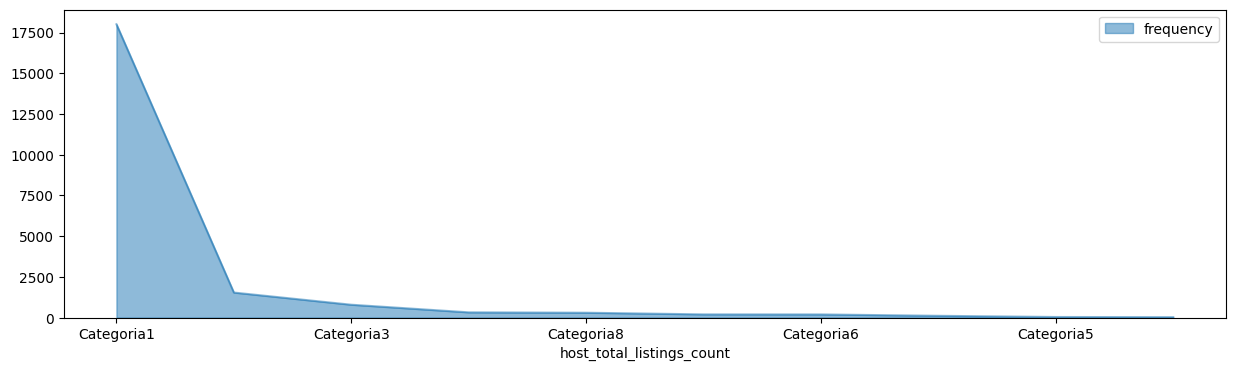

In [17]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)